In [1]:
from latinexpansion import eLHS, grade
import numpy as np
from scipy.stats.qmc import LatinHypercube as LHSSampler
from src.fancyplotter import usePlotSampleSet
from src.eLHS_old import grade as grade_old

LHS = LHSSampler(d=2)

In [3]:
N, M, P = 30, 10, 2
LHS1 = LHSSampler(d=P)
ss1 = LHS1.random(N)

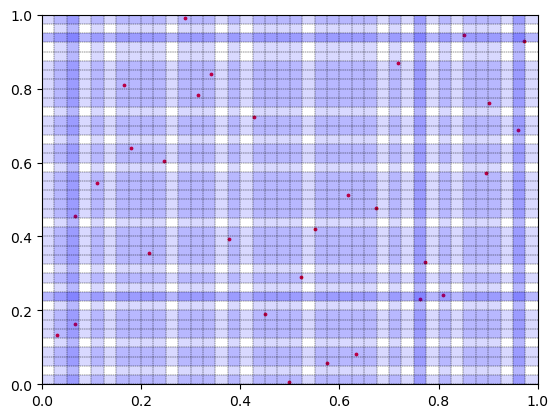

In [6]:
## grade experiments
ss2 = LHS1.random(N)
plotter = usePlotSampleSet(ss2, grid=True, highlight=True)
plotter(Ntot=N+M)
newgr = grade(ss2, M=M)
oldgr = grade_old(ss2, n=N+M)

# print(newgr, oldgr, "✅" if newgr==oldgr else "❌")

0, 3, 5

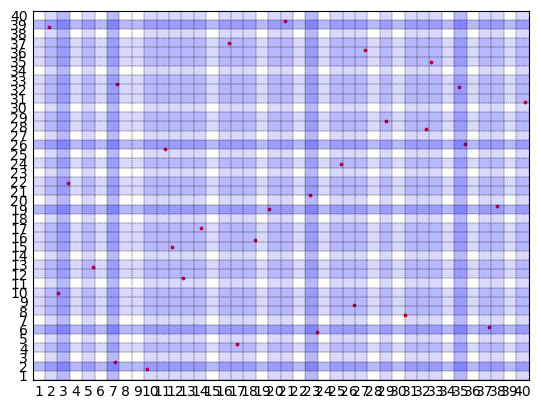

In [9]:
res = eLHS(ss1, M)
plotter(ss1, Ntot=N+M, interval_labels=True)